# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Query" data-toc-modified-id="Query-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Query</a></div>

In [15]:
%matplotlib inline
import requests
import json
import pandas as pd
from vega import Vega
import ipywidgets as widgets
carto_url ="https://wri-rw.carto.com/api/v2/sql"
api_url = "https://api.resourcewatch.org/v1/"

## Query

In [32]:
apiQuery = "select * from index_e663eb0904de4f39b87135c6c2ed10b5 where year >2016 and julian_day >130 order by year desc, julian_day desc limit 1000"
payload={'sql': apiQuery}
req = requests.get(api_url+"query/e663eb09-04de-4f39-b871-35c6c2ed10b5",params=payload,timeout=90)
if req.status_code!=200:
    print(req.text)
    raise req.raise_for_status
r = json.dumps(req.json()['data'])
glad_alerts = pd.read_json(r, orient='records')
glad_alerts.head(3)

,_id,confidence,confidence_text_,country_iso,dist_id,julian_day,lat,long,state_id,the_geom,the_geom_point,year
0,AVzuoOgB3gldqnB9pxvg,2,unconfirmed,PER,141,163,-1.826375,-73.160625,17,"{'type': 'point', 'coordinates': [-73.160625, ...","{'lat': -1.826375, 'lon': -73.160625}",2017
1,AVzuoOgB3gldqnB9pxvh,2,unconfirmed,PER,141,163,-1.826625,-73.160625,17,"{'type': 'point', 'coordinates': [-73.160625, ...","{'lat': -1.826625, 'lon': -73.160625}",2017
2,AVzuoP__3gldqnB9p6oL,2,unconfirmed,PER,141,163,-5.141125,-72.868875,17,"{'type': 'point', 'coordinates': [-72.868875, ...","{'lat': -5.141125, 'lon': -72.868875}",2017


In [34]:
print(req.url)

https://api.resourcewatch.org/v1/query/e663eb09-04de-4f39-b871-35c6c2ed10b5?sql=select+%2A+from+index_e663eb0904de4f39b87135c6c2ed10b5+where+year+%3E2016+and+julian_day+%3E130+order+by+year+desc%2C+julian_day+desc+limit+1000


In [41]:
vega_spec='''{
  "width": 300,
  "height": 200,
  "padding": {"top": 10, "left": 50, "bottom": 30, "right": 10},
  "data": [
    {
      "name": "table",
      "url": "https://api.resourcewatch.org/v1/query/e663eb09-04de-4f39-b871-35c6c2ed10b5?sql=select+%2A+from+index_e663eb0904de4f39b87135c6c2ed10b5+where+year+%3E2016+and+julian_day+%3E135+order+by+year+desc%2C+julian_day+desc limit 100000",
      "format": {"type": "json","property": "data"},
      "transform": [
        {"type": "sort","by": "julian_day"},
        {
          "type": "aggregate",
          "groupby":"julian_day",
          "summarize": [
          {"field": "julian_day", "ops": ["count"], "as": ["count_"]}
        ]
      }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "ordinal",
      "range": "width",
      "points": true,
      "domain": {"data": "table", "field": "julian_day"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "domain": {"data": "table", "field": "count_"}
    }
  ],
  "axes": [
    {"type": "x", "scale": "x"},
    {"type": "y", "scale": "y"}
  ],
  "marks": [
    {
  "type": "line",
  "from": {"data": "table"},
  "properties": {
    "enter": {
        "interpolate": {"value": "monotone"},
          "x": {"scale": "x","field": "julian_day"},
          "y": {"scale": "y","field": "count_"},
          "stroke": {"value": "steelblue"},
          "strokeWidth": {"value": 3}
        }
      }
    }
  ]
}'''

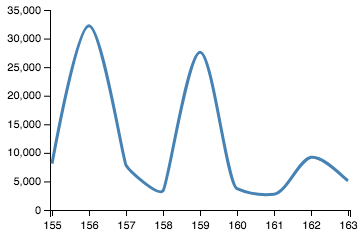

In [42]:

Vega(json.loads(vega_spec))